# Introduction à l'interpolation de Lagrange


#### Soit $xdata$ une liste de points définie par $[0,1,2,3,4]$ et $f(x)=x^4$. Le polynôme d'interpolation de Lagrange interpolant les points $(xdata[i], f(xdata[i]))$ de degré $\leq 4$ est unique.
 

In [1]:
xdata = [i for i in range(5)]; print(xdata)

[0, 1, 2, 3, 4]


In [2]:
f(x) = x^4

In [3]:
print [f(i) for i in xdata]

[0, 1, 16, 81, 256]


#### Question 1 : Ecrire une fonction lagrange qui prend en entrée $f$ et $xdata$ et qui calcule le polynôme de Lagrange de $f$. Noter que les points d'interpolation doivent être deux à deux distincts. Tester cette fonction sur les données de la question  1. 

In [4]:
def Lagrange(f, xdata):
    P = 0
    n = len(xdata)-1
    for i in range(n+1):
        L = 1
        for j in range(n+1):
            if i<>j:
                L = L * (x-xdata[j])/(xdata[i]-xdata[j])
        P += f(xdata[i])*L
    return(expand(P))
        

In [5]:
Lagrange(f, xdata)

x^4

In [6]:
Lagrange(sin, [-1,0,1,2])

1/6*x^3*sin(2) - 1/3*x^3*sin(1) - 1/6*x*sin(2) + 4/3*x*sin(1)

#### Question 2 : Trouver la fonction prédéfinie sur SageMath permettant de calculer le polynôme de Lagrange interpolant un nuage de points. 

In [7]:
var('t')
R.<t> = QQ[t]
R.lagrange_polynomial([(0,0), (1,1), (2,4)])

t^2

In [8]:
import scipy
from scipy import interpolate
a = scipy.array([0,1,2])
b = scipy.array([0,1,4])
interpolate.lagrange(a, b)

poly1d([1., 0., 0.])

In [9]:
print _

   2
1 x


#### Question 3 : On considère des points équirépartis sur l'intervalle [-1,1]. Trouver la fonction générant automatiquement ces points, connaissant le pas. 

In [10]:
from numpy import arange
arange(-1.0, 1.0, 0.4)

array([-1. , -0.6, -0.2,  0.2,  0.6])

#### Question 4 : Dessiner sur un même graphique, la fonction $f(x)=sin(x)$, les points d'interpolation $xdata$ ainsi que le poynôme de Lagrange de $f$ en $xdata$. Refaire le graphique pour $f(x)=1/(1+14*x^2)$ et un nombre de points allant juqu'à 20. 

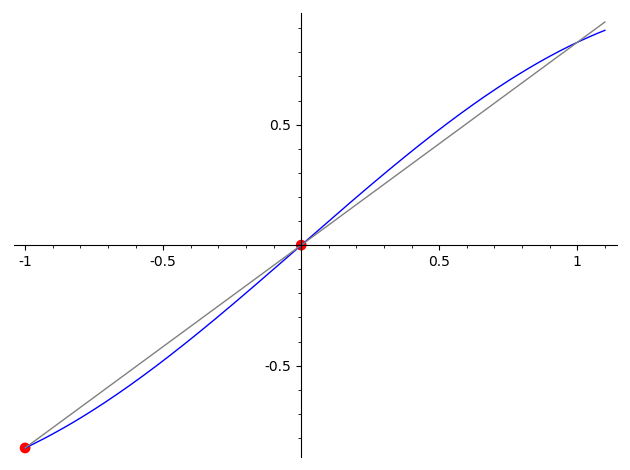

In [11]:
n = 2

xdata = arange(-1.0, 1.0, 2/n)
f(x) = sin(x)

P = Lagrange(f, xdata)

S = Graphics()
S += plot(f, -1, 1.1, color="blue")
S += plot(P, -1, 1.1, color="grey")
for i in xdata:
    S += point((i,f(i)), color="red", size=60)
S.show()

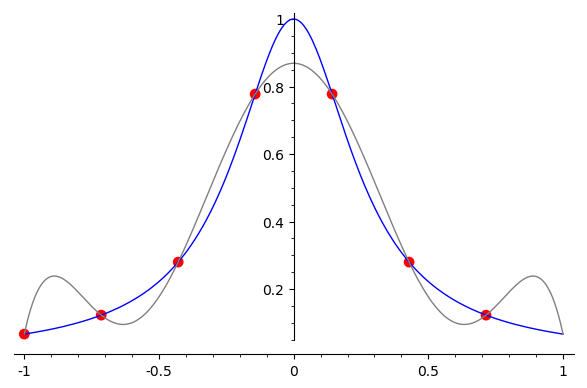

In [12]:
n = 7

xdata = arange(-1.0, 1.0, 2/n)
f(x) = 1/(1+14*x^2)

P = Lagrange(f, xdata)

S = Graphics()
S += plot(f, -1, 1, color="blue")
S += plot(P, -1, 1, color="grey")
for i in xdata:
    S += point((i,f(i)), color="red", size=60)
S.show()

# Erreur d'interpolation 

#### Question 5 : Afin de réduire l'erreur d'interpolation, on considère les zéros de Tchebychev définis sur $[-1,1]$ pour $n$ fixé à 5 : $ydata = cos(\frac{2k+1}{2n+2}\pi)$. Dessiner sur un même graphique, $f$, ($ydata[i]$, $f(ydata[i])$) et le polynôme de Lagrange de $f$ en $ydata$. 

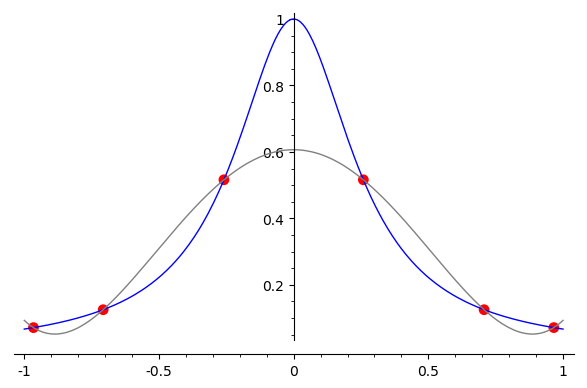

In [13]:
n = 5

ydata = [N(cos((2*k+1)*pi/(2*n+2))) for k in range(n+1)]
f(x) = 1/(1+14*x^2)

P = Lagrange(f, ydata)

S = Graphics()
S += plot(f, -1, 1, color="blue")
S += plot(P, -1, 1, color="grey")
for i in ydata:
    S += point((i,f(i)), color="red", size=60)
S.show()


 - **Question 7** : Qu'en est-il si le nombre de points d'interpolation est égal à 20 ? 

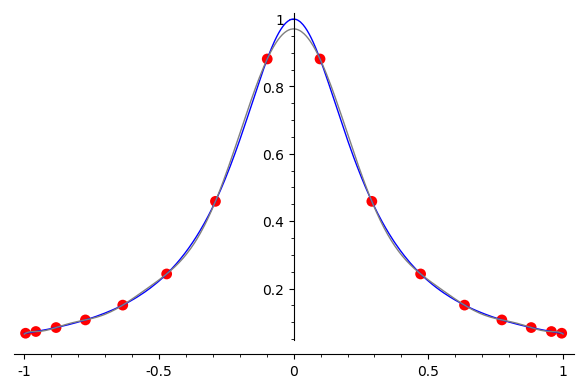

In [14]:
#n = 20 
n = 15

ydata = [N(cos((2*k+1)*pi/(2*n+2))) for k in range(n+1)]
f(x) = 1/(1+14*x^2)

P = Lagrange(f, ydata)

S = Graphics()
S += plot(f, -1, 1, color="blue")
S += plot(P, -1, 1, color="grey")
for i in ydata:
    S += point((i,f(i)), color="red", size=60)
S.show()

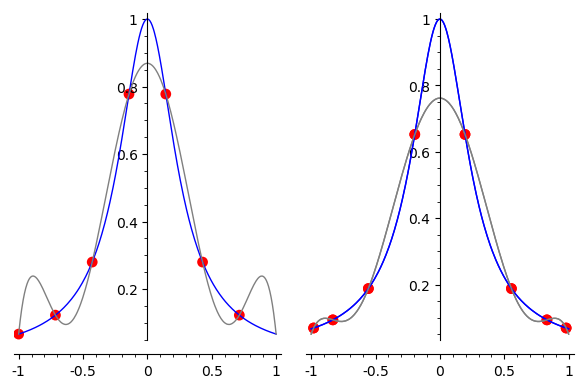

In [15]:
n = 7

xdata = arange(-1.0, 1.0, 2/n)
ydata = [N(cos((2*k+1)*pi/(2*n+2))) for k in range(n+1)]

f(x) = 1/(1+14*x^2)

P = Lagrange(f, xdata)
Q = Lagrange(f, ydata)

S = Graphics()
S += plot(f, -1, 1, color="blue")
T = S

S += plot(P, -1, 1, color="grey")
T += plot(Q, -1, 1, color="grey")

for i in xdata:
    S += point((i,f(i)), color="red", size=60)
for j in ydata:
    T += point((j, f(j)), color="red", size=60)
graphics_array([S,T])